# Weather in Australia. Will it rain tomorrow?
## Introduction to the project 


### Context 

In this case, the project involves analyzing the "**Weather in AUS**" dataset from Kaggle, which contains information about various weather conditions across different cities in Australia. 

**Context of the project's integration into the business:** From a business perspective, weather data analysis is crucial for a wide range of industries, such as agriculture, transportation, energy, and tourism. By leveraging this dataset, we can gain valuable insights into weather patterns and trends, enabling organizations to make informed decisions that can optimize their operations, mitigate risks, and enhance their overall profitability. 

**From a technical point of view:** Technically, this project presents an exciting opportunity to showcase our data science skills. We will explore various techniques for data cleaning, preprocessing, exploratory analysis, and predictive modeling. The dataset contains a rich set of variables, including date, location, temperature, rainfall, wind speed, humidity, pressure, and cloud coverage. By applying advanced statistical and machine learning methods, we can uncover intricate relationships and patterns hidden within the data, leading to accurate weather forecasting models. 

**From an economic point of view:** Weather conditions have a significant impact on economic activities across various sectors. Accurate weather predictions can help businesses plan their operations more efficiently, reducing costs and improving profitability. For example, the agriculture industry can optimize crop yields by understanding weather patterns and making informed decisions about planting, harvesting, and irrigation. Similarly, energy companies can better manage their supply and demand based on weather forecasts, ensuring reliable and cost-effective energy distribution. 

**From a scientific point of view:** Scientifically, this project provides an excellent opportunity to contribute to the field of meteorology and climate science. By analyzing the Australian weather data, we can validate existing models, identify potential improvements, and even develop new theories or techniques for weather prediction. Our findings could help advance our understanding of atmospheric processes, climate change patterns, and other phenomena related to weather and climate. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:

df = pd.read_csv("C:/Users/dcruz2/Desktop/DUP/project/weatherAUS.csv")

### Exploration of the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

The dataset has 23 variables, 6 of which are categorical. The first column is the date, and we will later change it to datetime.

4 variables present a missing value rate close to 40%.

In [5]:
# Print the first 5 rows, corresponding to 5 days from december 2008
df.head().T

,0,1,2,3,4
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04,2008-12-05
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28.0,32.3
Rainfall,0.6,0.0,0.0,0.0,1.0
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44.0,44.0,46.0,24.0,41.0
WindDir9am,W,NNW,W,SE,ENE


In [6]:
#sns.pairplot(df)

In [7]:
# We are going to replace from objet to boolean the  target variable RainTomorrow and the variable RainToday

df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [10]:
df.drop(['Date'], axis=1, inplace=True)

In [11]:
df['RainTomorrow'].value_counts() / len(df)

0.0    0.758394
1.0    0.219146
Name: RainTomorrow, dtype: float64

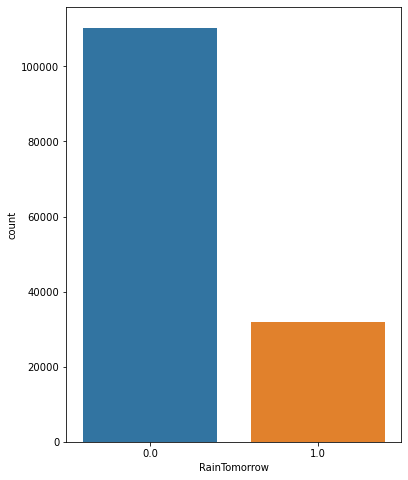

In [12]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=df)
plt.show()

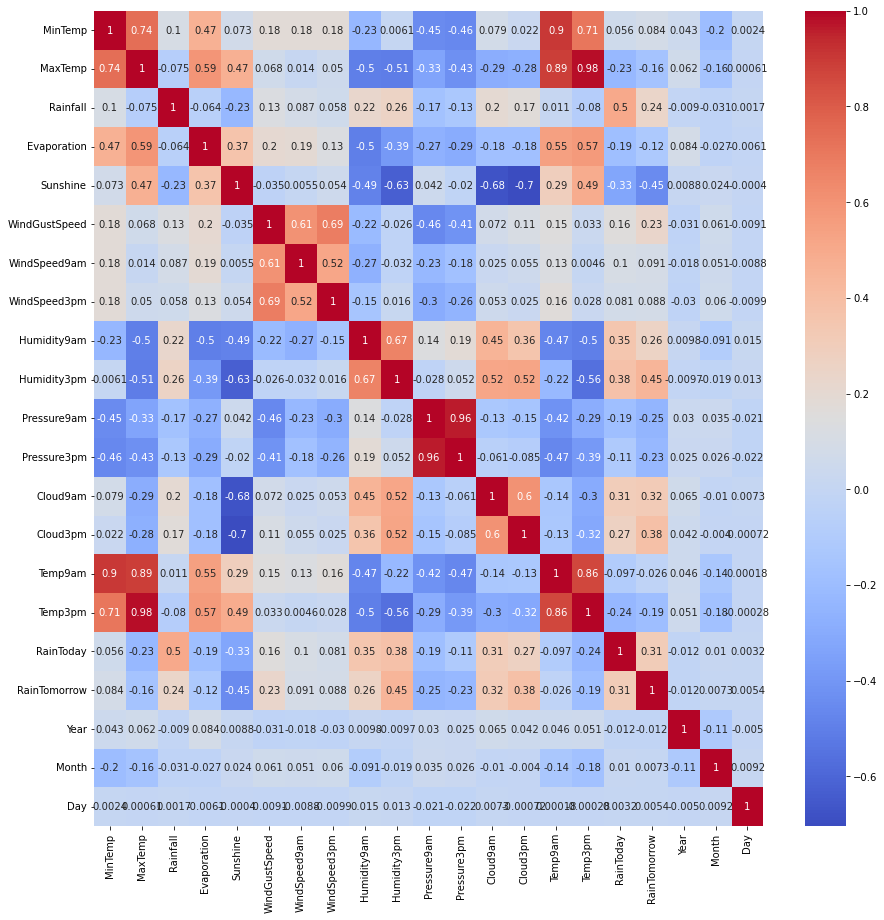

In [13]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize= (15,15))

sns.heatmap(corr_matrix, annot=True, ax = ax, cmap = 'coolwarm')
plt.show()

In [14]:
df.describe(include = object).T

,count,unique,top,freq
Location,145460,49,Canberra,3436
WindGustDir,135134,16,W,9915
WindDir9am,134894,16,N,11758
WindDir3pm,141232,16,SE,10838


#### Filling Missing Values

In [15]:
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_vars] = df[numerical_vars].fillna(df[numerical_vars].mean())

In [16]:
cat_vars = df.select_dtypes(include=['object']).columns
df[cat_vars] = df[cat_vars].fillna(df[cat_vars].mode())


In [17]:
##There was some missing values in the following variables that we are not interested in
df['RainTomorrow'].value_counts() / len(df)
df['RainToday'].value_counts() / len(df)

0.000000    0.758415
1.000000    0.219167
0.224193    0.022419
Name: RainToday, dtype: float64

In [18]:
##
df = df[(df['RainTomorrow'] == 0) | (df['RainTomorrow'] == 1)]
df = df[(df['RainToday'] == 0) | (df['RainToday'] == 1)]

In [19]:
df['RainTomorrow'].value_counts() / len(df)
df['RainToday'].value_counts() / len(df)

0.0    0.776577
1.0    0.223423
Name: RainToday, dtype: float64

#### IQR Outliers

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,140787.0,12.184854,6.393226,-8.5,7.600000,12.000000,16.800000,33.9
MaxTemp,140787.0,23.235090,7.106739,-4.8,17.900000,22.700000,28.200000,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.000000,0.000000,0.800000,371.0
Evaporation,140787.0,5.470699,3.179314,0.0,4.000000,5.468232,5.468232,145.0
Sunshine,140787.0,7.621352,2.741407,0.0,7.611178,7.611178,8.700000,14.5
WindGustSpeed,140787.0,39.974705,13.131804,6.0,31.000000,39.000000,46.000000,135.0
WindSpeed9am,140787.0,13.990893,8.852854,0.0,7.000000,13.000000,19.000000,130.0
WindSpeed3pm,140787.0,18.631707,8.718654,0.0,13.000000,18.662657,24.000000,87.0
Humidity9am,140787.0,68.827415,18.960665,0.0,57.000000,70.000000,83.000000,100.0
Humidity3pm,140787.0,51.451522,20.546973,0.0,37.000000,51.539116,65.000000,100.0


If we compare the mean of each column with the min/max value, we'll notice that Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm might have outliers as there's a considerable difference between average value and max value.

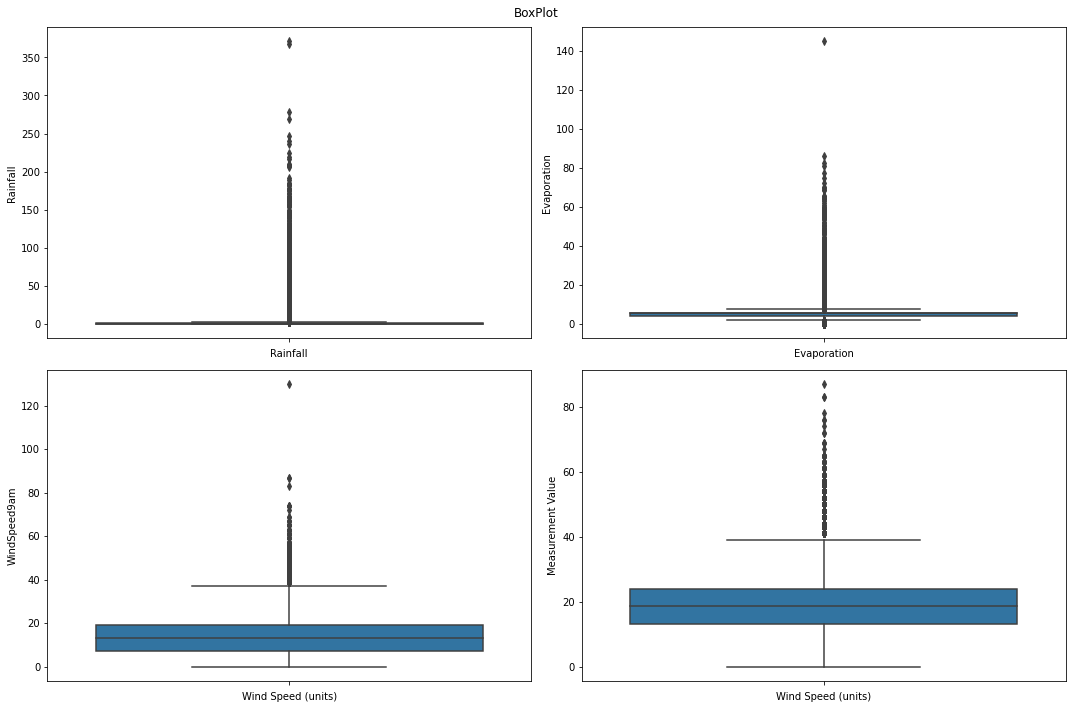

In [21]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
ax = sns.boxplot(y=df["Rainfall"])
ax.set_xlabel("Rainfall") 

plt.subplot(2, 2, 2)
ax = sns.boxplot(y=df["Evaporation"])
ax.set_xlabel("Evaporation")  

plt.subplot(2, 2, 3)
ax = sns.boxplot(y=df["WindSpeed9am"])
ax.set_xlabel("Wind Speed (units)")  

plt.subplot(2, 2, 4)
ax = sns.boxplot(y=df["WindSpeed3pm"])
ax.set_xlabel("Wind Speed (units)")  

plt.ylabel("Measurement Value") 
plt.suptitle("BoxPlot")
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show() 

In [22]:
fill_iqr = lambda col, iqr: col.apply(lambda x: iqr if x > iqr else x)

In [23]:
# IQR (Inter Quartile Range) 
Q1 = df["Rainfall"].quantile(0.25)
Q3 = df["Rainfall"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
Up_Limit = Q3 + (2.5 * IQR)
print(Up_Limit)


0.8
2.8


In [24]:
df["Rainfall"] = fill_iqr(df["Rainfall"], Up_Limit)

In [25]:
# IQR (Inter Quartile Range) 
Q1 = df["Evaporation"].quantile(0.25)
Q3 = df["Evaporation"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
Up_Limit = Q3 + (2.5 * IQR)
print(Up_Limit)

1.4682315229224638
9.138810330228623


In [26]:
df["Evaporation"] = fill_iqr(df["Evaporation"], Up_Limit)

In [27]:
# IQR (Inter Quartile Range) 
Q1 = df["WindSpeed9am"].quantile(0.25)
Q3 = df["WindSpeed9am"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
Up_Limit = Q3 + (2.5 * IQR)
print(Up_Limit)

12.0
49.0


In [28]:
df["WindSpeed9am"] = fill_iqr(df["WindSpeed9am"], Up_Limit)

In [29]:
# IQR (Inter Quartile Range) 
Q1 = df["WindSpeed3pm"].quantile(0.25)
Q3 = df["WindSpeed3pm"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
Up_Limit = Q3 + (2.5 * IQR)
print(Up_Limit)

11.0
51.5


In [30]:
df["WindSpeed3pm"] = fill_iqr(df["WindSpeed3pm"], Up_Limit)

#### Separate and encode

In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X = df.drop("RainTomorrow",axis=1)
y = df["RainTomorrow"]


In [32]:

cat_vars = X.select_dtypes(include=['object']).columns
X[cat_vars] = X[cat_vars].apply(label_encoder.fit_transform)

In [33]:
X.head().T

,0,1,2,3,4
Location,2.000000,2.000000,2.000000,2.000000,2.000000
MinTemp,13.400000,7.400000,12.900000,9.200000,17.500000
MaxTemp,22.900000,25.100000,25.700000,28.000000,32.300000
Rainfall,0.600000,0.000000,0.000000,0.000000,1.000000
Evaporation,5.468232,5.468232,5.468232,5.468232,5.468232
Sunshine,7.611178,7.611178,7.611178,7.611178,7.611178
WindGustDir,13.000000,14.000000,15.000000,4.000000,13.000000
WindGustSpeed,44.000000,44.000000,46.000000,24.000000,41.000000
WindDir9am,13.000000,6.000000,13.000000,9.000000,1.000000
WindDir3pm,14.000000,15.000000,15.000000,0.000000,7.000000


In [34]:
y.head()
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 140787 entries, 0 to 145458
Series name: RainTomorrow
Non-Null Count   Dtype  
--------------   -----  
140787 non-null  float64
dtypes: float64(1)
memory usage: 2.1 MB


In [35]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

#### SCALING DATA

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

### MODEL Logistic Regression

In [37]:
#y_train = y_train.replace({0: 'No', 1: 'Yes'})
#y_test = y_test.replace({0: 'No', 1: 'Yes'})

In [38]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [39]:
y_pred = logreg.predict(X_test_scaled)
logreg.score(X_test_scaled, y_test)

0.8440466889220352

In [40]:
print(y_pred)

[0. 0. 0. ... 0. 0. 0.]


In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[31012  1808]
 [ 4779  4638]]


<AxesSubplot:>

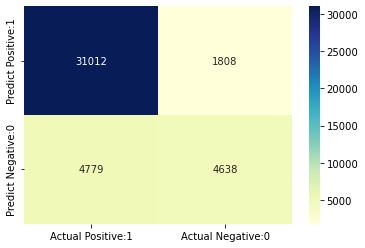

In [42]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### MODEL RF

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [44]:
y_pred_rf = rf.predict(X_test_scaled)
rf.score(X_test_scaled, y_test)

0.8575419655752066

In [45]:
print(y_pred_rf)

[0. 0. 0. ... 0. 0. 0.]


In [46]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[31447  1373]
 [ 4644  4773]]


<AxesSubplot:>

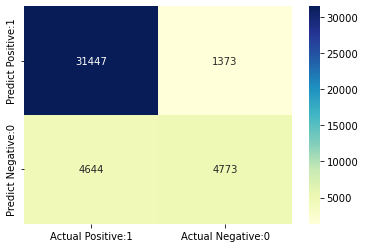

In [47]:
cm_matrix_rf = pd.DataFrame(data=cm_rf, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_rf, annot=True, fmt='d', cmap='YlGnBu')

### MODEL DT

In [48]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [49]:
y_pred_dt = rf.predict(X_test_scaled)
dt.score(X_test_scaled, y_test)

0.7889054620356559

In [50]:
print(y_pred_dt)

[0. 0. 0. ... 0. 0. 0.]


In [51]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

[[31447  1373]
 [ 4644  4773]]


<AxesSubplot:>

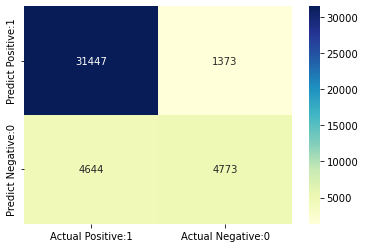

In [52]:
cm_matrix_dt = pd.DataFrame(data=cm_dt, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_dt, annot=True, fmt='d', cmap='YlGnBu')